Epoch 1/10
600/600 [==============================] - 27s 44ms/step - loss: 0.2557 - accuracy: 0.9241 - val_loss: 0.0762 - val_accuracy: 0.9764
Epoch 2/10
600/600 [==============================] - 29s 49ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 3/10
600/600 [==============================] - 42s 71ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 4/10
600/600 [==============================] - 42s 70ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0407 - val_accuracy: 0.9873
Epoch 5/10
600/600 [==============================] - 43s 71ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0367 - val_accuracy: 0.9878
Epoch 6/10
600/600 [==============================] - 42s 71ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0410 - val_accuracy: 0.9881
Epoch 7/10
600/600 [==============================] - 43s 71ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0367 - val_accuracy:

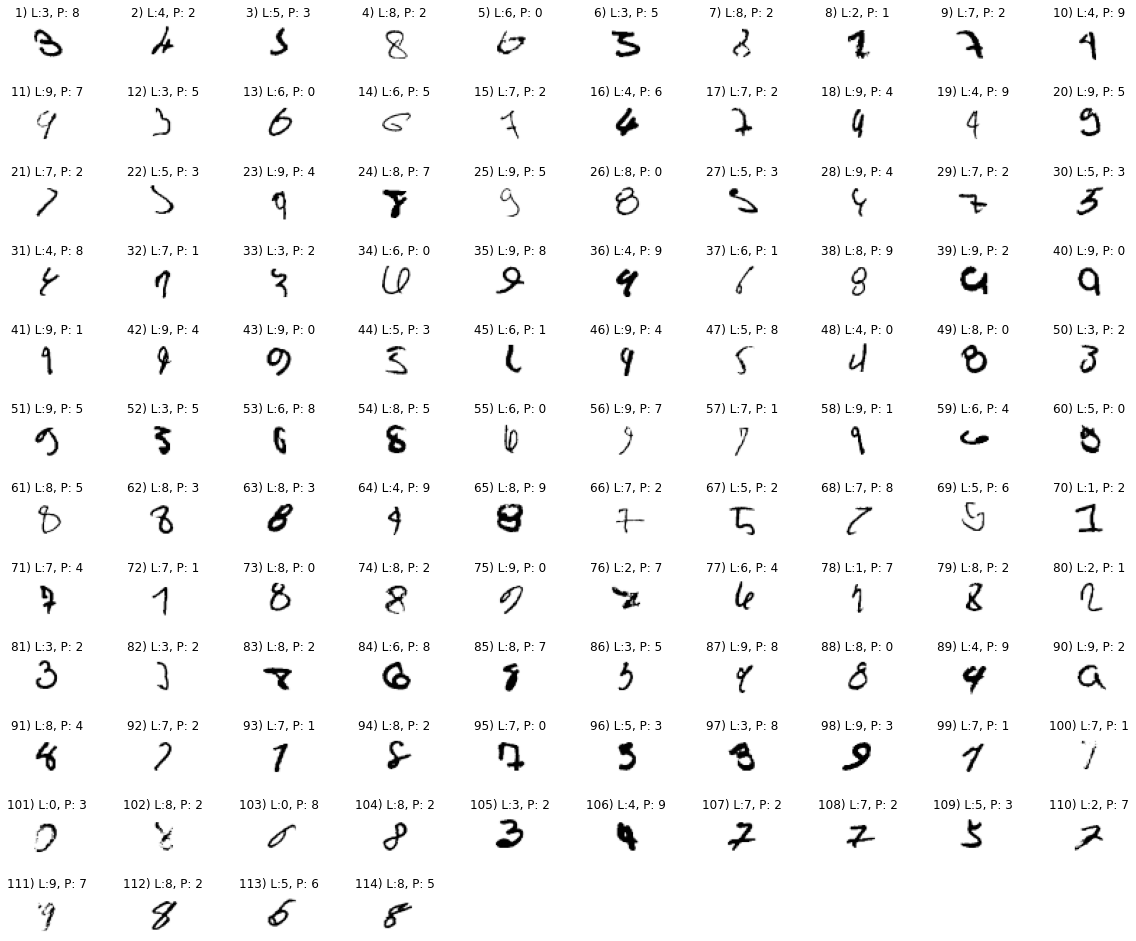

In [12]:
import tensorflow as tf
import numpy as np

import idx2numpy
import matplotlib.cm as cm
import matplotlib.pyplot as plt

PATH = 'C:/Projects/keras_talk/keras/intern/0709/MNIST/'
EPOCHS = 10
BATCH_SIZE = 100

x_test_path = 't10k-images.idx3-ubyte'
y_test_path = 't10k-labels.idx1-ubyte'
x_train_path = 'train-images.idx3-ubyte'
y_train_path = 'train-labels.idx1-ubyte'


x_test = idx2numpy.convert_from_file(PATH+x_test_path)
y_test = idx2numpy.convert_from_file(PATH+y_test_path)
x_train = idx2numpy.convert_from_file(PATH+x_train_path)
y_train = idx2numpy.convert_from_file(PATH+y_train_path)


x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32') / 255.
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train = tf.keras.utils.to_categorical(y_train,10)


import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential()

Conv1 = Conv2D( 16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) )
Conv2 = Conv2D( 32, kernel_size=(3,3), activation='relu' )
MaxP  = MaxPooling2D(pool_size=(2,2))
Flat  = Flatten()
Lay1  = Dense( 32, activation='relu')
Lay2  = Dense( 10, activation='softmax')

model.add(Conv1)
model.add(Conv2)
model.add(MaxP)
model.add(Flat)
model.add(Lay1)
model.add(Lay2)


#
model.compile( loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

hist = model.fit( x_train, y_train, epochs=EPOCHS,
                  validation_data=(x_test, y_test), batch_size=BATCH_SIZE)

scores = model.evaluate( x_test, y_test, steps=5 )
print("{}: {:0.2f}%".format(model.metrics_names[1], scores[1]*100))



#
PREDICTED_RESULT = model.predict(x_test)
PREDICTED_LABELS = np.argmax(PREDICTED_RESULT, axis=1)
TEST_LABELS = np.argmax(y_test, axis=1)
WRONG_RESULTS = []

for n in range(len(TEST_LABELS)):
    if PREDICTED_LABELS[n] != TEST_LABELS[n]:
        WRONG_RESULTS.append(n)

print(len(WRONG_RESULTS)//10)

plt.figure(figsize = ( len(WRONG_RESULTS)//10 +2, 10 ))
for n in range(len(WRONG_RESULTS)):
    idx = WRONG_RESULTS[n]
    plt.subplot( len(WRONG_RESULTS)//10 +2, 10, n+1)
    plt.imshow( x_test[idx].reshape(28,28), cmap='Greys' )
    tmp = str(n+1)+")"+" L:"+ str(TEST_LABELS[idx]) + ", P: "+ str(PREDICTED_LABELS[idx])
    plt.title(tmp)
    plt.axis("off")

plt.subplots_adjust(right=1.3, top=1.5, wspace=1, hspace=1)
plt.savefig('MNIST CNN.png', bbox_inches='tight')
plt.show()

